<a href="https://colab.research.google.com/github/dioz-s/StudyGroup_ML/blob/main/Tugas_SHD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [403]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

df= pd.read_csv('https://raw.githubusercontent.com/Ardavaa/GDG-feature-eng-data-prep/refs/heads/main/dataset-penugasan/SHP.csv')

df.head(10)

,Unnamed: 0,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
1,1,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
2,2,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
3,3,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
4,4,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,Candra Jacostaffey,True
5,5,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
6,6,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
7,7,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
8,8,0008_03,Europa,False,B/1/P,55 Cancri e,45.0,False,39.0,7295.0,589.0,110.0,124.0,Wezena Flatic,True
9,9,0009_01,Mars,False,F/1/P,TRAPPIST-1e,32.0,False,73.0,0.0,1123.0,0.0,113.0,Berers Barne,True


In [404]:
cols_to_remove = ['Unnamed: 0', 'PassengerId','Name']
df.drop(cols_to_remove, axis=1, inplace=True)

df.head(5)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
1,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
2,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
3,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
4,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,inf,True


In [405]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   HomePlanet    11985 non-null  object
 1   CryoSleep     11955 non-null  object
 2   Cabin         11982 non-null  object
 3   Destination   11981 non-null  object
 4   Age           11993 non-null  object
 5   VIP           11963 non-null  object
 6   RoomService   12002 non-null  object
 7   FoodCourt     11991 non-null  object
 8   ShoppingMall  11964 non-null  object
 9   Spa           11985 non-null  object
 10  VRDeck        11975 non-null  object
 11  Transported   12138 non-null  bool  
dtypes: bool(1), object(11)
memory usage: 1.0+ MB


In [406]:
fix_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

df[fix_cols] = df[fix_cols].apply(pd.to_numeric, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12138 entries, 0 to 12137
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    11985 non-null  object 
 1   CryoSleep     11955 non-null  object 
 2   Cabin         11982 non-null  object 
 3   Destination   11981 non-null  object 
 4   Age           11923 non-null  float64
 5   VIP           11963 non-null  object 
 6   RoomService   11933 non-null  float64
 7   FoodCourt     11915 non-null  float64
 8   ShoppingMall  11882 non-null  float64
 9   Spa           11918 non-null  float64
 10  VRDeck        11889 non-null  float64
 11  Transported   12138 non-null  bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 1.0+ MB


In [407]:
df.duplicated().sum()

3214

In [408]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [409]:
df.isna().sum().sort_values(ascending=False)

,0
ShoppingMall,198
VRDeck,182
FoodCourt,172
Spa,171
RoomService,169
Age,161
CryoSleep,153
VIP,144
Cabin,128
Destination,125


handle missing value data numerik

In [410]:
num_cols = ["ShoppingMall", "VRDeck", "FoodCourt", "Spa", "RoomService", "Age"]

for col in num_cols:
  df[col].fillna(df[col].median(), inplace=True)

df.isna().sum().sort_values(ascending=False)

,0
CryoSleep,153
VIP,144
Cabin,128
Destination,125
HomePlanet,123
Age,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


handle data kategorikal

In [411]:
cat_cols = ['HomePlanet', 'Cabin', 'Destination', 'VIP']

for col in cat_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)


df.loc[(df["RoomService"] == 0) &
       (df["FoodCourt"] == 0) &
       (df["ShoppingMall"] == 0) &
       (df["Spa"] == 0) &
       (df["VRDeck"] == 0), "CryoSleep"] = True

df.isna().sum().sort_values(ascending=False)

,0
CryoSleep,85
HomePlanet,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [412]:
cat_cols = ['CryoSleep']

for col in cat_cols:
  df[col].fillna(df[col].mode()[0], inplace=True)

df.isna().sum().sort_values(ascending=False)

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


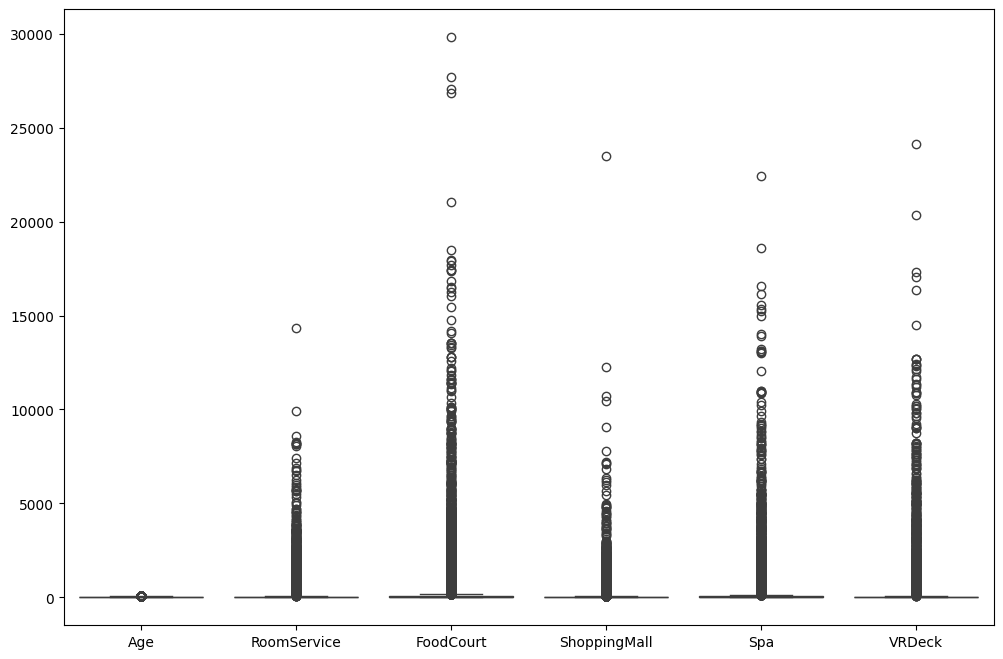

In [413]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(12,8))
sns.boxplot(data=df[num_cols])
plt.show()

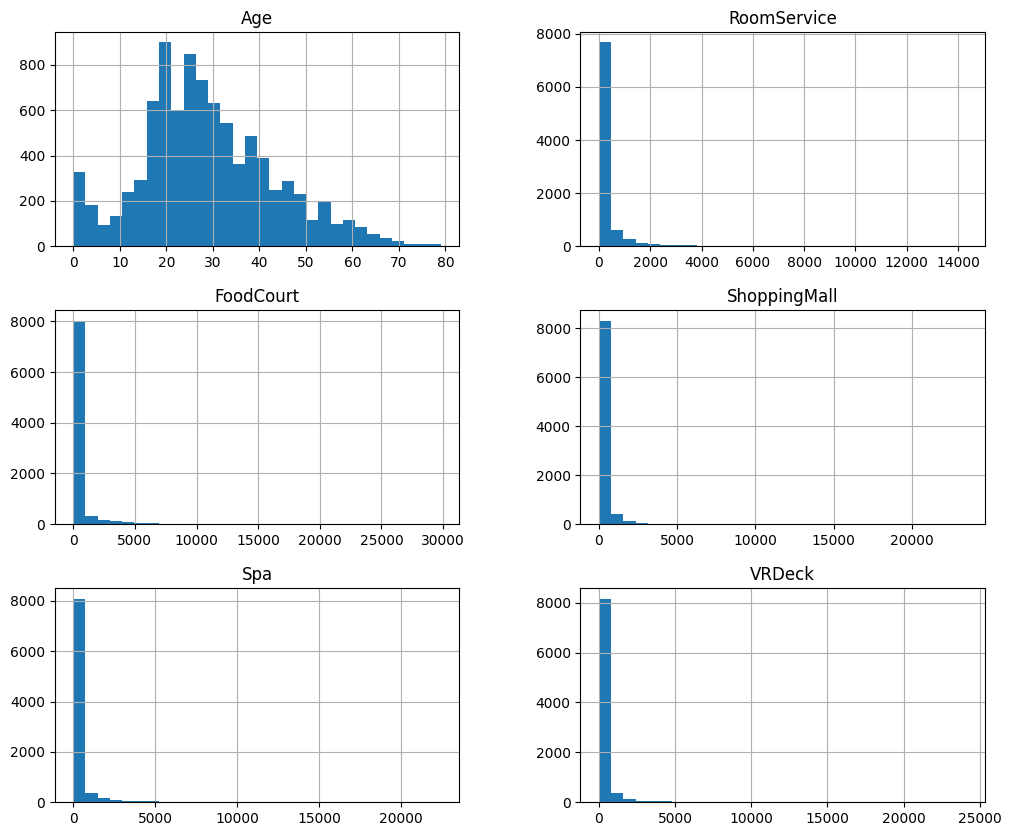

In [414]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)

for col in num_cols:
  df[col].fillna(df[col].median(), inplace=True)

df[num_cols].hist(bins=30, figsize=(12,10))
plt.show()

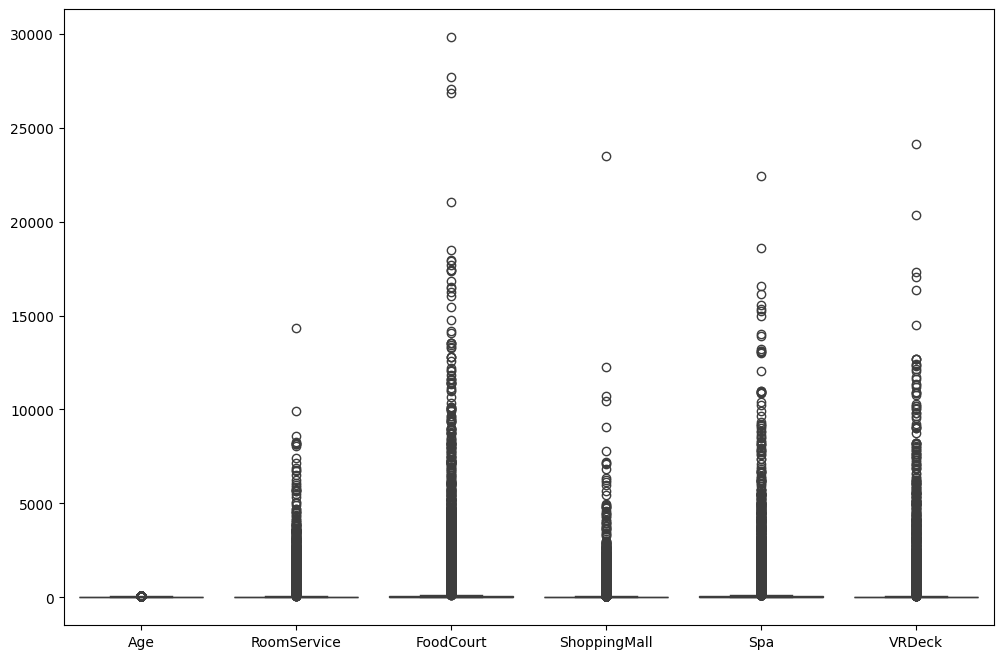

In [415]:
num_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

plt.figure(figsize=(12,8))
sns.boxplot(data=df[num_cols])
plt.show()

In [416]:
print(df[num_cols].head())

    Age  RoomService  FoodCourt  ShoppingMall    Spa  VRDeck
0  24.0        109.0        9.0          25.0  549.0    44.0
1  16.0        303.0       70.0         151.0  565.0     2.0
2  44.0          0.0      483.0           0.0  291.0     0.0
3  26.0         42.0     1539.0           3.0    0.0     0.0
4  28.0          0.0        0.0           0.0    0.0     0.0


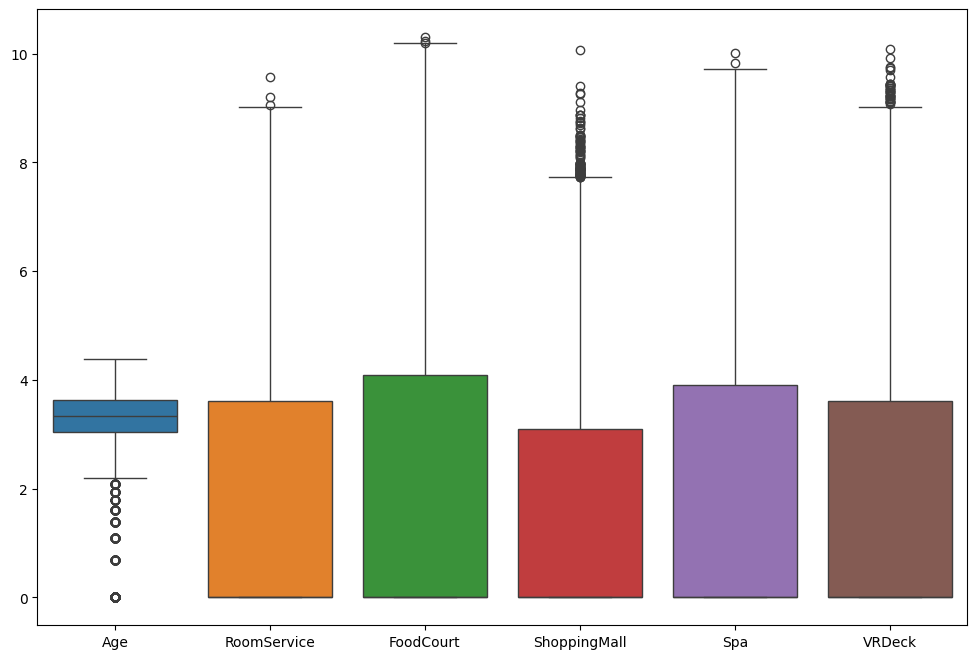

        Age  RoomService  FoodCourt  ShoppingMall       Spa    VRDeck
0  3.218876     4.700480   2.302585      3.258097  6.309918  3.806662
1  2.833213     5.717028   4.262680      5.023881  6.338594  1.098612
2  3.806662     0.000000   6.182085      0.000000  5.676754  0.000000
3  3.295837     3.761200   7.339538      1.386294  0.000000  0.000000
4  3.367296     0.000000   0.000000      0.000000  0.000000  0.000000


In [417]:
for col in num_cols:
    df[col] = np.log1p(df[col])

# print(df[num_cols].head())
plt.figure(figsize=(12,8))
sns.boxplot(data=df[num_cols])
plt.show()

print(df[num_cols].head())

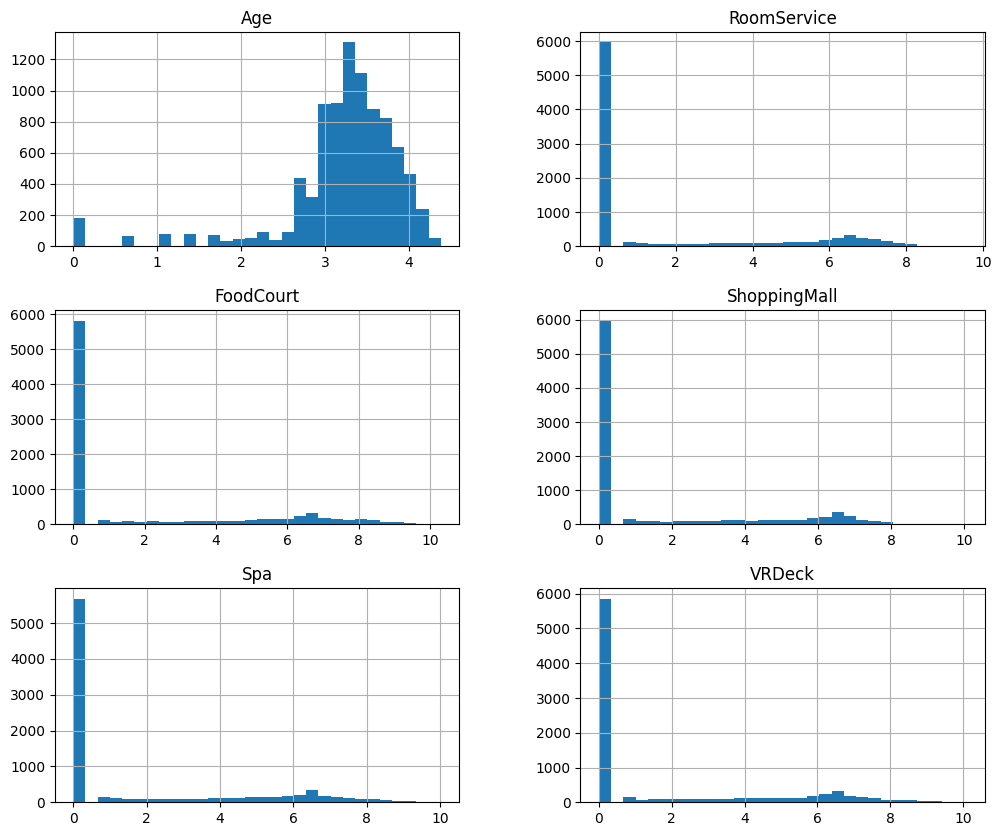

In [418]:
df[num_cols].hist(bins=30, figsize=(12,10))
plt.show()

In [419]:
from sklearn.model_selection import train_test_split

x=df.drop('Transported', axis=1)
y=df['Transported']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7139, 11), (1785, 11), (7139,), (1785,))

In [390]:
x_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
3507,Europa,False,D/225/P,TRAPPIST-1e,3.295837,False,0.000000,6.799056,0.000000,6.538140,0.693147
1158,Earth,True,G/428/S,PSO J318.5-22,3.044522,False,0.000000,0.000000,0.000000,0.000000,0.000000
7509,Earth,-,-,TRAPPIST-1e,3.610918,False,0.000000,8.010360,0.000000,0.000000,4.595120
10245,Earth,True,G/820/P,TRAPPIST-1e,3.135494,False,0.000000,0.000000,0.000000,0.000000,0.000000
1111,Europa,False,E/179/S,TRAPPIST-1e,3.761200,False,1.098612,8.014666,0.000000,4.499810,2.397895
...,...,...,...,...,...,...,...,...,...,...,...
8948,Earth,False,G/362/S,TRAPPIST-1e,2.995732,False,3.295837,5.749393,6.154858,0.000000,0.000000
8405,Earth,True,G/188/S,TRAPPIST-1e,1.609438,False,0.000000,0.000000,0.000000,0.000000,0.000000
8604,Earth,False,F/322/P,TRAPPIST-1e,3.218876,False,0.000000,0.000000,1.945910,6.530878,0.000000
862,Europa,True,C/66/P,TRAPPIST-1e,2.772589,False,0.000000,0.000000,0.000000,0.000000,0.000000


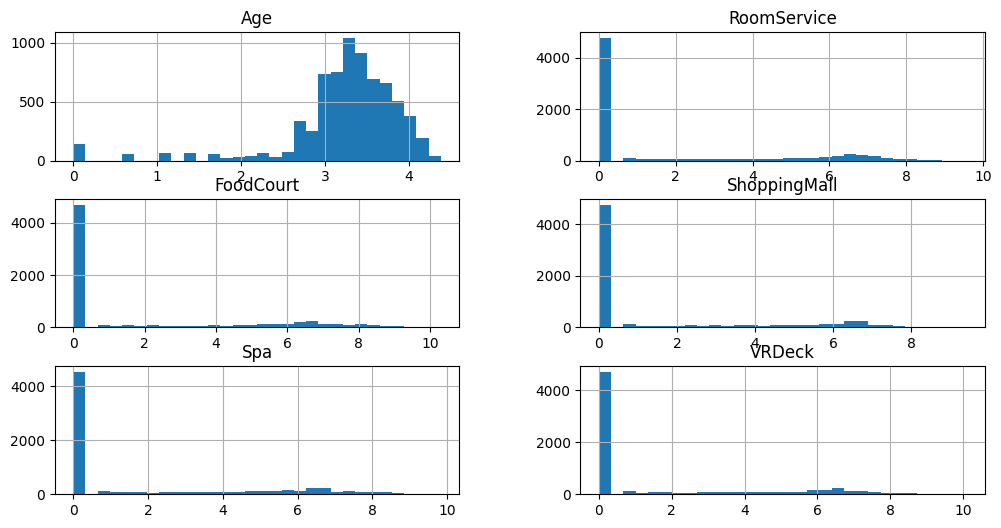

In [420]:
x_train[num_cols].hist(bins=30, figsize=(12,6))
plt.show()

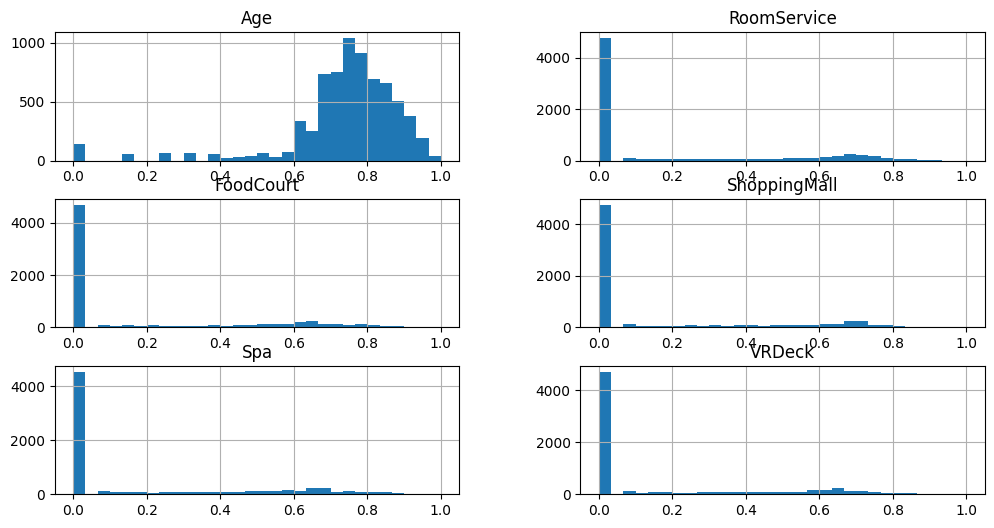

In [421]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train[num_cols] = scaler.fit_transform(x_train[num_cols])
x_test[num_cols] = scaler.transform(x_test[num_cols])

x_train[num_cols].hist(bins=30, figsize=(12,6))
plt.show()

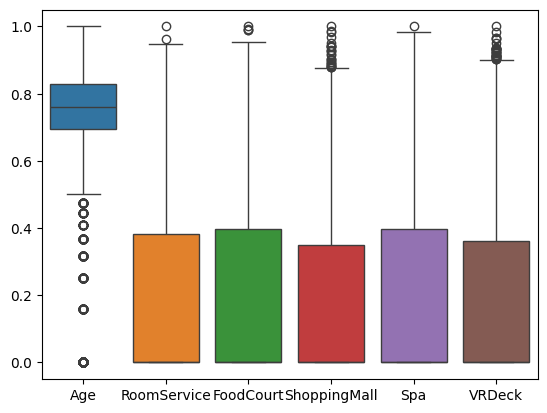

In [422]:
sns.boxplot(data=x_train[num_cols])
plt.show()

In [423]:
x_train.isna().sum()

,0
HomePlanet,0
CryoSleep,0
Cabin,0
Destination,0
Age,0
VIP,0
RoomService,0
FoodCourt,0
ShoppingMall,0
Spa,0


In [424]:
x_train.isna().sum() / len(x_train)

,0
HomePlanet,0.0
CryoSleep,0.0
Cabin,0.0
Destination,0.0
Age,0.0
VIP,0.0
RoomService,0.0
FoodCourt,0.0
ShoppingMall,0.0
Spa,0.0


In [425]:
categorical_cols = x_train.select_dtypes(include=['object']).columns
categorical_cols

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP'], dtype='object')

In [426]:
print('-'*50)
for col in categorical_cols:
  print(x_train[col].value_counts())
  print('-'*50)

--------------------------------------------------
HomePlanet
Earth     3841
Europa    1754
Mars      1462
-           61
-inf        12
inf          9
Name: count, dtype: int64
--------------------------------------------------
CryoSleep
False    4083
True     2965
True       53
-          26
-inf       11
inf         1
Name: count, dtype: int64
--------------------------------------------------
Cabin
-           167
-inf         14
inf          12
G/1476/S      7
B/82/S        7
           ... 
F/349/P       1
C/307/P       1
F/1494/S      1
E/604/S       1
E/357/P       1
Name: count, Length: 5464, dtype: int64
--------------------------------------------------
Destination
TRAPPIST-1e      4955
55 Cancri e      1461
PSO J318.5-22     639
-                  61
-inf               12
inf                11
Name: count, dtype: int64
--------------------------------------------------
VIP
False    6897
True      162
-          49
inf        17
-inf       14
Name: count, dtype: int64
------

In [427]:
x_train['HomePlanet'].replace({'-inf':'inf', '-':'inf'}, inplace=True)
x_test['HomePlanet'].replace({'-inf':'inf', '-':'inf'}, inplace=True)

x_train['CryoSleep'].replace({'-inf':'inf', '-':'inf','True':'True'}, inplace=True)
x_test['CryoSleep'].replace({'-inf':'inf', '-':'inf','True':'True'}, inplace=True)

x_train['Cabin'].replace({'-inf':'inf', '-':'inf'}, inplace=True)
x_test['Cabin'].replace({'-inf':'inf', '-':'inf'}, inplace=True)

x_train['Destination'].replace({'-inf':'inf', '-':'inf'}, inplace=True)
x_test['Destination'].replace({'-inf':'inf', '-':'inf'}, inplace=True)

x_train['VIP'].replace({'-inf':'inf', '-':'inf'}, inplace=True)
x_test['VIP'].replace({'-inf':'inf', '-':'inf'}, inplace=True)


In [428]:
print('-'*50)
for col in categorical_cols:
  print(x_train[col].value_counts())
  print('-'*50)

--------------------------------------------------
HomePlanet
Earth     3841
Europa    1754
Mars      1462
inf         82
Name: count, dtype: int64
--------------------------------------------------
CryoSleep
False    4083
True     2965
True       53
inf        38
Name: count, dtype: int64
--------------------------------------------------
Cabin
inf         193
G/734/S       7
G/1476/S      7
B/82/S        7
D/176/S       7
           ... 
F/349/P       1
C/307/P       1
F/1494/S      1
E/604/S       1
E/357/P       1
Name: count, Length: 5462, dtype: int64
--------------------------------------------------
Destination
TRAPPIST-1e      4955
55 Cancri e      1461
PSO J318.5-22     639
inf                84
Name: count, dtype: int64
--------------------------------------------------
VIP
False    6897
True      162
inf        80
Name: count, dtype: int64
--------------------------------------------------


In [429]:
y_train

,Transported
3507,True
1158,True
7509,True
10245,False
1111,True
...,...
8948,False
8405,False
8604,False
862,True


In [430]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# for col in categorical_cols:
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

y_train

array([1, 1, 1, ..., 0, 1, 0])

In [431]:
print(f'train Label \n{pd.Series(y_train).value_counts()}')
print()
print(f'test Label \n{pd.Series(y_test).value_counts()}')


train Label 
1    3675
0    3464
Name: count, dtype: int64

test Label 
1    934
0    851
Name: count, dtype: int64


In [433]:
x_train['Transported'] = y_train
x_test['Transported'] = y_test
x_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
3507,Europa,False,D/225/P,TRAPPIST-1e,0.752126,False,0.000000,0.659927,0.0,0.665157,0.068687,1
1158,Earth,True,G/428/S,PSO J318.5-22,0.694775,False,0.000000,0.000000,0.0,0.000000,0.000000,1
7509,Earth,inf,inf,TRAPPIST-1e,0.824029,False,0.000000,0.777498,0.0,0.000000,0.455351,1
10245,Earth,True,G/820/P,TRAPPIST-1e,0.715535,False,0.000000,0.000000,0.0,0.000000,0.000000,0
1111,Europa,False,E/179/S,TRAPPIST-1e,0.858324,False,0.114798,0.777917,0.0,0.457788,0.237618,1


In [434]:
print("Train missing data: ", x_train.isna().sum().sum()), "\nTest missing data: ", x_test.isna().sum().sum()
print("Test duplicated data: ", x_test.duplicated().sum()), "\nTrain duplicated data: ", x_train.duplicated().sum()

Train missing data:  0
Test duplicated data:  5


(None, '\nTrain duplicated data: ', 77)

In [435]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1785 entries, 9033 to 196
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    1785 non-null   object 
 1   CryoSleep     1785 non-null   object 
 2   Cabin         1785 non-null   object 
 3   Destination   1785 non-null   object 
 4   Age           1785 non-null   float64
 5   VIP           1785 non-null   object 
 6   RoomService   1785 non-null   float64
 7   FoodCourt     1785 non-null   float64
 8   ShoppingMall  1785 non-null   float64
 9   Spa           1785 non-null   float64
 10  VRDeck        1785 non-null   float64
 11  Transported   1785 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 181.3+ KB


In [437]:
print(f'Baris data: {len(df)}')

Baris data: 8924


In [441]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0